<a href="https://colab.research.google.com/github/Oloadama/Calories_Predictions/blob/main/Calories_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression Assignment

#Project: Predicting Calories Burnt During a Workout Session

###Objective : The goal of this project is to analyze the provided dataset, perform Exploratory Data Analysis (EDA) to uncover insights, and build a linear regression model to predict the number of calories burnt during a workout session.

##Data loading

In [1]:
## import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/Oyeniran20/Machine-Learning/refs/heads/main/3.%20Classification%20-/Exercise.csv'

In [3]:
exercise_df = pd.read_csv(url)

##Data understanding and wrangling

In [4]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [5]:
## A look at the pandas dataframe to see the different data types and missing values
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
## checking the number of rows and columns contained in the dataset
exercise_df.shape

(15000, 9)

#### Insights from the Dataset (a csv file) shows that the dataset contains 9 variables of 1 categorical and 8 continous/numerical columns and an observations of 15000 without any missing value.

In [7]:
## summary statistics of the exercise dataframe
exercise_df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


In [8]:
exercise_df.Duration.sort_values(ascending =False)

,Duration
3900,30
3871,30
14976,30
12813,30
4940,30
...,...
301,1
24,1
5257,1
12156,1


## Feature Engineering

####In this session, I'll be adding two different features to the dataframe. BMI (a continous variable) is a factor of height and weight and Weight category, which is a categorical variable.

In [9]:
## additing BMI. BMI is a calculated measure of a person's body weight (in kilograms) divided by the square of their height (in meters)
exercise_df['BMI'] = exercise_df['Weight']/(exercise_df['Height']/100)**2


In [10]:
## checking if the 'BMI' column has been added to the dataframe
exercise_df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'BMI'],
      dtype='object')

In [11]:
exercise_df.BMI.sort_values(ascending =False)

,BMI
10603,29.069767
4534,29.025311
4723,29.017447
12124,28.787152
11567,28.634039
...,...
14618,19.596458
10240,19.562955
10289,19.473407
11789,19.297399


In [12]:
## Weight categories to classify their weight as being either underweight, normal weight, overweight or obesity by using the calculated BMI
exercise_df['Weight_category'] = pd.cut(
    exercise_df['BMI'],
    bins = [0, 18.5, 24.9, 29.9, 39.9, 100],
    labels = ['Under weight', 'Normal', 'Over weight', 'Obesity', 'Morbid Obesity']
)


In [13]:
exercise_df.Weight_category

,Weight_category
0,Over weight
1,Normal
2,Normal
3,Normal
4,Normal
...,...
14995,Normal
14996,Normal
14997,Normal
14998,Over weight


In [14]:
exercise_df.Weight_category.sort_values(ascending=False)

,Weight_category
0,Over weight
7957,Over weight
7874,Over weight
7873,Over weight
7871,Over weight
...,...
2686,Normal
8009,Normal
8010,Normal
8011,Normal


In [15]:
## checking the new dataframe to see the engineered features and their observations using the head function
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Weight_category
0,14733363,male,68,190,94,29,105,40.8,231,26.038781,Over weight
1,14861698,female,20,166,60,14,94,40.3,66,21.773842,Normal
2,11179863,male,69,179,79,5,88,38.7,26,24.655910,Normal
3,16180408,female,34,179,71,13,100,40.5,71,22.159109,Normal
4,17771927,female,27,154,58,10,81,39.8,35,24.456063,Normal


In [16]:
## I'm dropping the User_ID columns since it's not relevant to my EDA and modelling
##exercise_df.drop(['User_ID'], axis=1, inplace=True)
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Weight_category
0,14733363,male,68,190,94,29,105,40.8,231,26.038781,Over weight
1,14861698,female,20,166,60,14,94,40.3,66,21.773842,Normal
2,11179863,male,69,179,79,5,88,38.7,26,24.655910,Normal
3,16180408,female,34,179,71,13,100,40.5,71,22.159109,Normal
4,17771927,female,27,154,58,10,81,39.8,35,24.456063,Normal


##Data Visualisation/ Exploratory Data Analysis

In [17]:
## Importing the libraries for the visulaisation and EDA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
## separating the dataframe into numerical and categorical variables
numeric_cols = exercise_df.select_dtypes(include=np.number).columns.drop('Calories') ## dropped the calories columns because it's the target column
categoric_cols = exercise_df.select_dtypes(exclude=np.number).columns

User_ID skewness = 0.004788390719914252


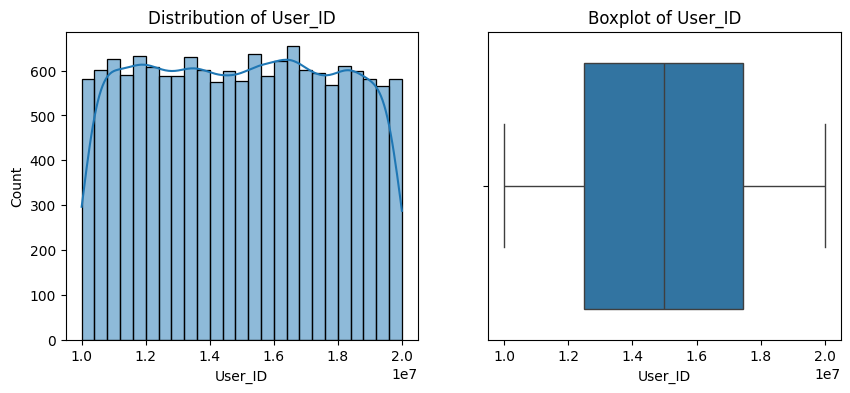

Age skewness = 0.47338270096138746


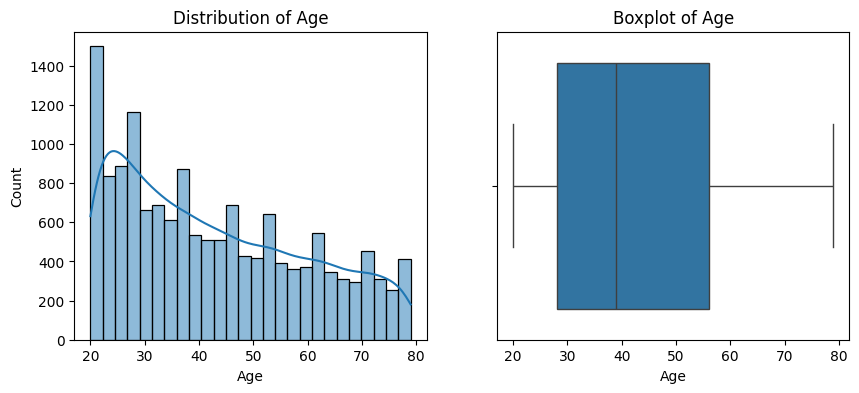

Height skewness = -0.006189620437893538


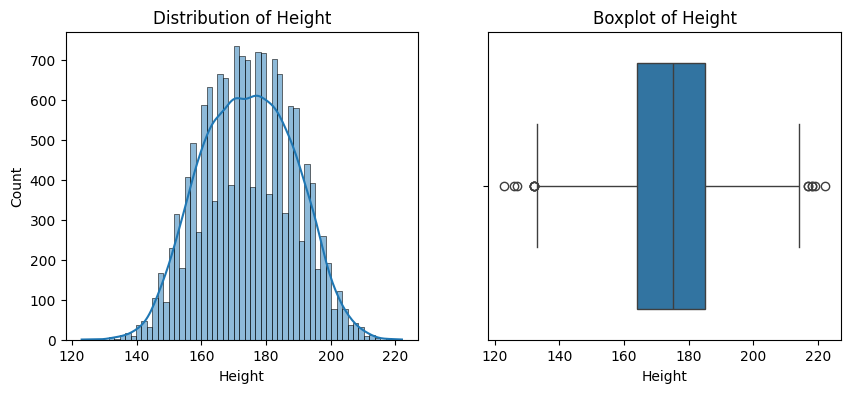

Weight skewness = 0.22672530725814513


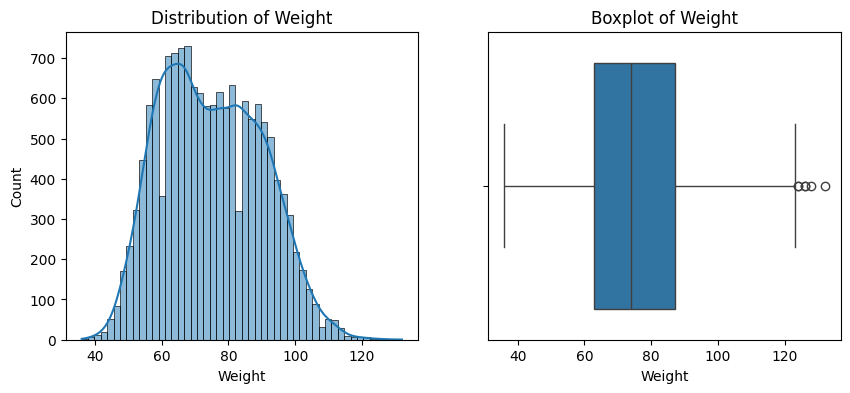

Duration skewness = 0.0047505366680978415


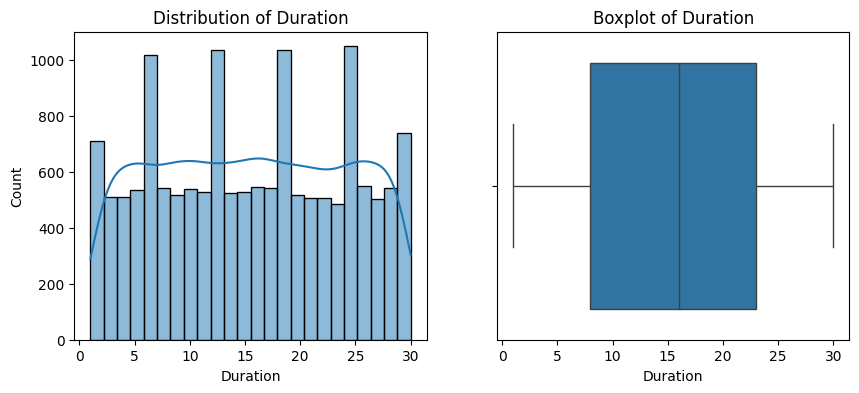

Heart_Rate skewness = -0.01070407972854895


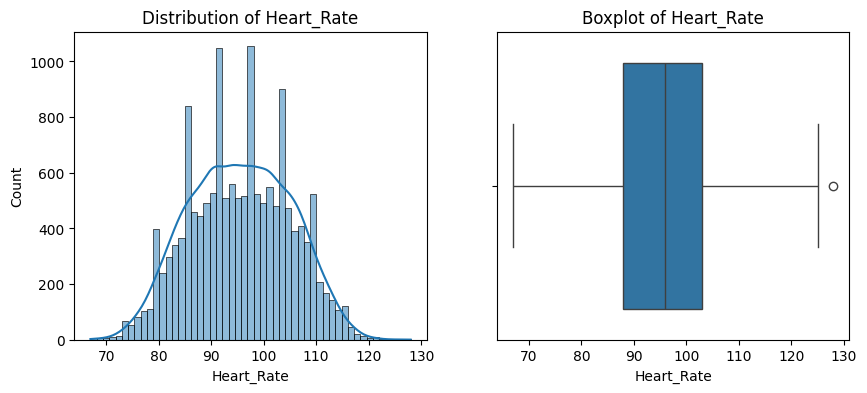

Body_Temp skewness = -0.9943824155974582


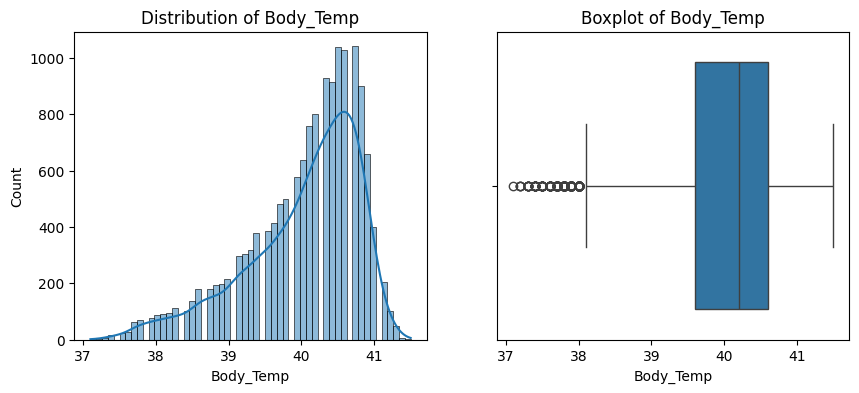

Calories skewness = 0.5053713740451047


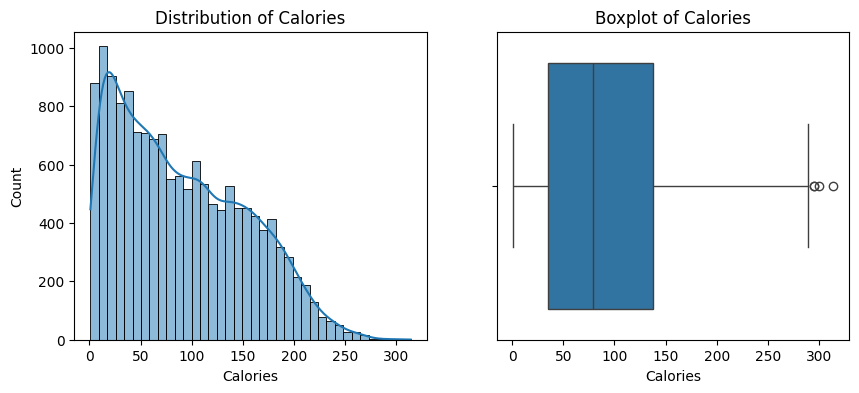

BMI skewness = -0.08217908154943329


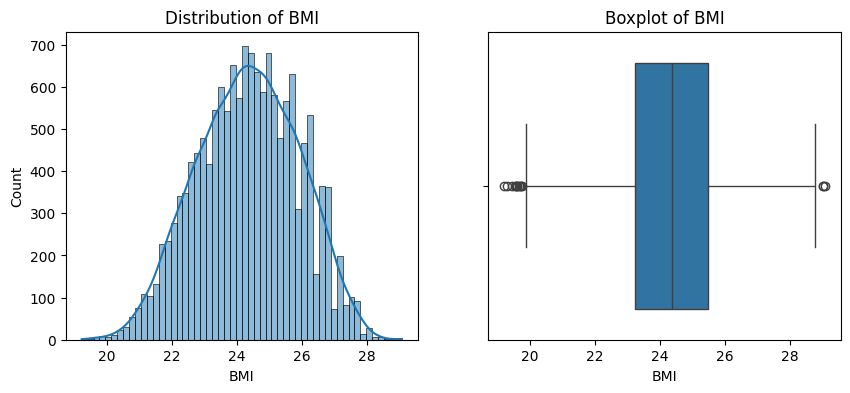

In [19]:
## checking for the distribution (Histogram) and skewness (boxplot) of the data
for col in exercise_df.select_dtypes(include=np.number).columns:
  skewness =exercise_df[col].skew()
  print(f'{col} skewness = {skewness}')
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  sns.histplot(data=exercise_df, x=col, kde=True)
  plt.title(f'Distribution of {col}')
  plt.subplot(1,2,2)
  sns.boxplot(data=exercise_df, x=col)
  plt.title(f'Boxplot of {col}')
  plt.show()


#### while some of the columns (Height, Weight, Heart rate, and BMI) have near normal distribution, some are slightly skewed. From the domain understanding of these features, the skewness is allowed. For instance, the body temperature is skewed left, which is highly correlated with the duration of exercise as seen in the correlation studies below.

## Correlation matrix

In [20]:
## A look at the relationship between the numberical columns
exercise_corr_matrix = exercise_df.select_dtypes(include=np.number).corr()
exercise_corr_matrix

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661,-0.003654
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395,0.255609
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537,0.477897
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481,0.700217
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421,0.006042
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882,0.011792
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558,0.010827
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000,0.056473
BMI,-0.003654,0.255609,0.477897,0.700217,0.006042,0.011792,0.010827,0.056473,1.000000


<Axes: >

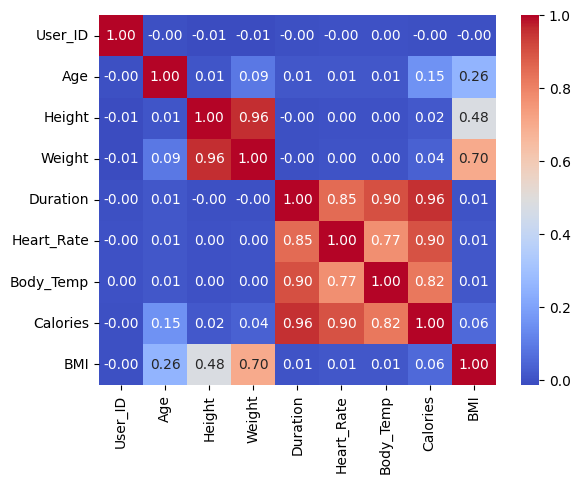

In [21]:
## visulaising the correlation matrix using seaborn
sns.heatmap(exercise_corr_matrix, annot = True, fmt= '.2f', cmap = 'coolwarm')

#### As expected, duration of exercise shows high correlation with calories burned. The target variable shows good correlation with heart rate and body temperature. Notably, weight and height have great correlation. Also, BMI have a good relationshipp with weight. Others worthy of mentioning are heart rate and duration and body temperature and duration. There is also slight negative correlations between duration and height, and duration and weight, which are better seen in the table.

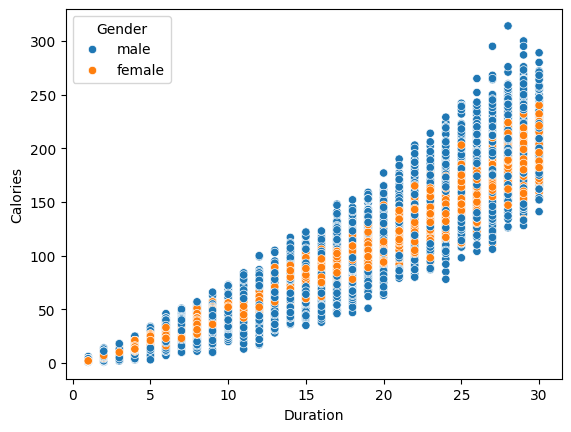

In [22]:
## checking if there is realtionship between gender, duration of exercise and calories burned.
sns.scatterplot(x= exercise_df.Duration, y= exercise_df.Calories, hue= exercise_df['Gender'])

plt.show()

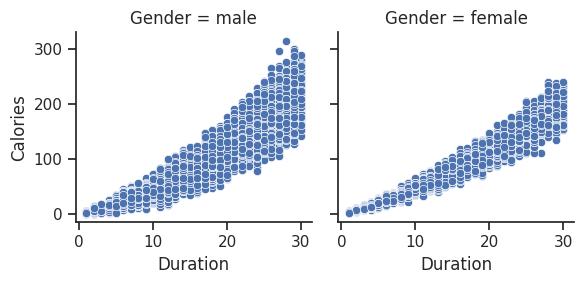

In [23]:
## facetting the above plot to shows the relationship between gender, duration, and calories.
sns.set(style = 'ticks')
g = sns.FacetGrid(exercise_df, col = 'Gender')
g.map(sns.scatterplot, 'Duration', 'Calories')
plt.show()


#### Interestingly, the ralationship shows that, at the same levels of exercise duration, males tend to burn more calories than females.

## Data splitting

In [24]:
## importing the train_test_split function from sklearn library
from sklearn.model_selection import train_test_split

In [25]:
## droping Calories column for the y-coordinate and the remaining columns (features) for the x-columns
x = exercise_df.drop(['Calories'], axis=1)
y = exercise_df['Calories']

In [26]:
## splitting both coordinates into train and test samples (80/20) using the imported function
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

##Data Preprocessing

In [27]:
## Importing standard scaler and one hot encoder from the sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
Encoder = OneHotEncoder(drop='first')
Scaler = StandardScaler()

In [28]:
## encoding the categorical variables
train_cat =Encoder.fit_transform(x_train[categoric_cols])
test_cat = Encoder.transform(x_test[categoric_cols])

In [29]:
## Scaling of the numeric columns (Standardisation method that brings the num cols in a close range to avoid prediction bias by the model.)
train_num = Scaler.fit_transform(x_train[numeric_cols])
test_num = Scaler.transform(x_test[numeric_cols])


In [30]:
## Combining the train and test numeric anc categorical columns
train_processed = np.hstack((train_num, train_cat.toarray())) ## concatenate function can also be used implace of np.hstack()
test_processed = np.hstack((test_num, test_cat.toarray()))

## Model Selection and training

In [31]:
## importing Linear Regression since the target feature is a continous variable
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


In [32]:
model = LinearRegression()
pipeline = Pipeline([
    ('model', model)
])

In [33]:
## model fitting
pipeline.fit(train_processed, y_train)



Pipeline(steps=[('model', LinearRegression())])

In [34]:
## making prediction with our train and test data samples
train_prediction = pipeline.predict(train_processed)
test_prediction = pipeline.predict(test_processed)


In [35]:
train_prediction
test_prediction

array([175.64156898, 192.18493765,  54.20368055, ..., 128.33111722,
         7.42792938, 191.23102037])

In [36]:
## displaying the model performance (Actual and test predicted values) against their differences in a dataframe
Pred_tab_df = pd.DataFrame({
    'Actual Calories': y_test,
    'Predicted Calories': test_prediction,
    'Difference': y_test - test_prediction
})

In [37]:
Pred_tab_df

,Actual Calories,Predicted Calories,Difference
11499,173,175.641569,-2.641569
6475,189,192.184938,-3.184938
13167,53,54.203681,-1.203681
862,161,154.465176,6.534824
5970,226,211.729055,14.270945
...,...,...,...
6216,186,183.643759,2.356241
3585,53,59.231485,-6.231485
10023,120,128.331117,-8.331117
14044,20,7.427929,12.572071


## Model Evaluation

In [38]:
## Importing mean squared error and r2 score
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
train_MSE = mean_squared_error(train_prediction, y_train)
test_MSE = mean_squared_error(test_prediction, y_test)

In [40]:
train_r2_score = r2_score(train_prediction, y_train)
test_r2_score = r2_score(test_prediction, y_test)

In [41]:
train_MSE, test_MSE

(120.28406020746236, 125.5594999541851)

In [42]:
train_r2_score, test_r2_score

(0.9678861371834572, 0.9675590243073227)

#### r2 score shows 96 percent goodness of the model for both train and test data samples, which is a good performance from the model. The values of MSE for train and test data are close to each and this indicates that the model generalises well and didn't memorise the training data (overfitting)